<a href="https://colab.research.google.com/github/karansoni07/sign-detector/blob/main/notebookea3c76ad36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model, Model



In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = '/content/drive/MyDrive/Hand_digit/train'


In [ ]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2

)

In [ ]:
# Load and preprocess the training dataset
train_generator = datagen.flow_from_directory(
    dataset_path, subset='training', batch_size=32,
    class_mode='categorical', target_size=(64, 64))

Found 1653 images belonging to 10 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    dataset_path, subset='validation', batch_size=32,
    class_mode='categorical', target_size=(64, 64))

Found 409 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

In [ ]:
def create_model():
    input_tensor = Input(shape=(64, 64, 3))
    pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                      input_shape=(64, 64, 3),
                                                      pooling='avg',
                                                      weights='imagenet')
    for layer in pretrained_model.layers:
        layer.trainable = False

    x = pretrained_model.output
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)

    predictions = Dense(10, activation='softmax')(x)
    combined_model = Model(inputs=pretrained_model.input, outputs=predictions)

    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
    combined_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return combined_model

In [ ]:
model = create_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

This callback allows you to save the model's weights at specific intervals or conditions, such as when the validation loss improves. This is helpful for preserving the best model weights and preventing overfitting.*italicized text*

In [ ]:
checkpoint_path = "/content/drive/MyDrive/Hand_digit/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
epochs=100
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
  callbacks=[cp_callback]
)

Epoch 1/100
52/52 [==============================] - ETA: 0s - loss: 2.2515 - accuracy: 0.1724
Epoch 1: saving model to /content/drive/MyDrive/Hand_digit/training_1/cp.ckpt
52/52 [==============================] - 15s 181ms/step - loss: 2.2515 - accuracy: 0.1724 - val_loss: 2.2046 - val_accuracy: 0.1443
Epoch 2/100
52/52 [==============================] - ETA: 0s - loss: 1.9601 - accuracy: 0.3249
Epoch 2: saving model to /content/drive/MyDrive/Hand_digit/training_1/cp.ckpt
52/52 [==============================] - 5s 104ms/step - loss: 1.9601 - accuracy: 0.3249 - val_loss: 2.0573 - val_accuracy: 0.2152
Epoch 3/100
52/52 [==============================] - ETA: 0s - loss: 1.7093 - accuracy: 0.4446
Epoch 3: saving model to /content/drive/MyDrive/Hand_digit/training_1/cp.ckpt
52/52 [==============================] - 5s 100ms/step - loss: 1.7093 - accuracy: 0.4446 - val_loss: 1.9072 - val_accuracy: 0.3839
Epoch 4/100
52/52 [==============================] - ETA: 0s - loss: 1.5142 - accuracy:

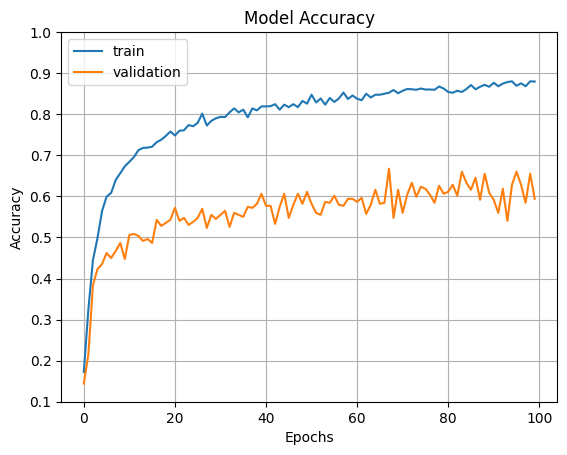

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#It is probable that your validation set is too small. I experienced such fluctuations when the validation set was too small (in number, not necessarily percentage split between training-validation).

# Making Prediction

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
example_image_path = '/content/drive/MyDrive/Hand_digit/test/example_image2.jpg'

In [ ]:
example_image = load_img(example_image_path, target_size=(64, 64))

In [ ]:
example_image_array = img_to_array(example_image)
preprocessed_ex_image = example_image_array / 255.0

In [ ]:
preprocessed_ex_image = np.expand_dims(preprocessed_ex_image, axis=0)

In [ ]:
prediction = model.predict(preprocessed_ex_image)

1/1 [==============================] - 1s 1s/step


In [ ]:
predicted_class = prediction.argmax(axis=-1)


In [ ]:
predicted_class

array([1])

In [ ]:
model.save('/content/drive/MyDrive/Hand_digit/final_model.hdf5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_13[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                              